Dans ce notebook vous aller apprendre les caractéristiques de deux des distributions les plus couramment utilisées:
* La distribution gaussienne
* La distribution uniforme
* Ce notebook permet de revenir sur les méthode d'implémentation du tirage aléatoire suivant ces deux lois.

# Distributions statistiques usuelles.

(dist_unif)=
## Distribution uniforme
Une distribution uniforme entre deux valeurs $a$ et $b$ consiste à associer à toutes les valeurs entre $a$ et $b$
la même probabilité.

### Caractéristique
* La loi de probabilité est donc:

$$p(x) = \frac{1}{b-a}$$

si x est compris entre a et b et p(x) = 0 sinon.
* L'espérance de la distribution est : $\mu = \frac{a+b}{2}$
* L'écart-type de la distribution est : $\sigma = \frac{b-a}{\sqrt{12}}$

```{note}
On utilise souvent la demi-largeur $t = \frac{b-a}{2}$. L'écart-type s'écrit alors:

$$\sigma = \frac{t}{\sqrt{3}}$$
```

### Simulation
Nous aurons régulièrement besoin de simuler des lois statistiques avec Python et notamment la loi uniforme.
Nous allons voir comment le faire dans la cellule suivante.

Lisez le code et chercher à le comprendre pour pouvoir l'utiliser ensuite.

---------------
Estimation
Moyenne =  4.495714334137393
Ecart-type =  0.8654691365866805
---------------
Valeur théorique d'une distribution uniforme
Moyenne :  4.5
Ecart-type :  0.8660254037844387
---------------


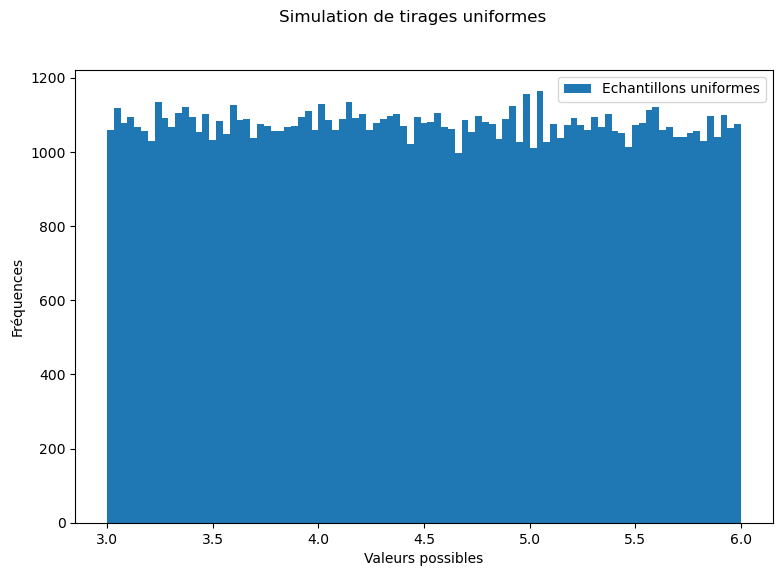

In [1]:
# La simulation nécessite la bibliothèque numpy.random que nous importons
import numpy.random as rd

# On importe aussi numpy pour manipuler des vecteurs numpy
# et matplotlib.pyplot pour des tracés graphiques
import numpy as np
import matplotlib.pyplot as plt

"""
La fonction uniform(a, b, N) (bibliothèque numpy.random) va créer un vecteur
de taille N simulant N tirages aléatoires suivant une distribution
uniforme entre a et b
"""
N = 100000
a = 3
b = 6
datsim = rd.uniform(a, b, N)

"""
Pour vérifier qu'on retombe bien sur les grandeurs, on va estimer
la moyenne et l'écart-type de l'échantillon créé précédemment.
Retenez ces fonctions qui sont très utiles. Elles appartiennent à
la bibliothèque numpy
"""
mech = np.mean(datsim)
sech = np.std(datsim, ddof=1)  # L'option ddof permet de diviser par N-1 et non par N
print("---------------")
print("Estimation")
print("Moyenne = ", mech)
print("Ecart-type = ", sech)
print("---------------")
print("Valeur théorique d'une distribution uniforme")
print("Moyenne : ", (b + a) / 2)
print("Ecart-type : ", (b - a) / np.sqrt(12))
print("---------------")

"""
On va maintenant tracer l'histogramme de l'échantillons
La fonction subplots créer une fenêtre graphique f avec des axes ax (ici un seul). 
Les options figsize et dpi ne sont pas à connaître.
Elles servent juste à avoir une figure plus grande pour le cours.
"""
f, ax = plt.subplots(1, 1, figsize=(9, 6), dpi=100)
f.suptitle("Simulation de tirages uniformes")  # Titre du graphique
ax.set_xlabel("Valeurs possibles")
ax.set_ylabel("Fréquences")

# On utilise hist(valeurs, bins) (bibliothèque matplotlib.pyplot)
# pour tracer l'histogramme.
ax.hist(datsim, bins='rice', label="Echantillons uniformes")
ax.legend()  # On ajoute la légende (le label)

plt.show()

## La distribution gaussienne

### Définition

La __loi gaussienne (ou loi normale)__ suit une loi de probabilité de la forme:

$$p(x) = \frac{1}{\sigma \sqrt{2\pi}}\exp^{- {1 \over 2} {\left(\frac{x - \mu}{\sigma}\right)}^2}$$

* $\mu$ est l'espérance de la distribution (donc pour nous la __valeur mesurée__).
* $\sigma$ est l'écart-type de la distribution (donc pour nous __l'incertitude-type__ associée)

### Caractéristiques
Observer graphiquement les caractéristiques d'une distribution normale :
* Elle est centrée sur son espérance $m$ (résultat de mesurage pour nous)
* Elle est d'autant plus large que l'écart-type $s$ est grand.
* La probabilité qu'un tirage se trouve dans l'intervalle $[m - s; m + s]$ est de 68% (on parle d'intervalle de confiance)
* L'intervalle de confiance à 95% est l'intervalle $[m - 2s; m + 2s]$

Cela signifie que pour une distribution gaussienne, l'intervalle précédemment "contient 95% des valeurs possibles". 
__C'est pourquoi en physique, on considère généralement cet intervalle l'intervalle dans lequel se trouverait 
les résultats de mesurage possibles pour un mesurande : $[m - 2s; m + 2s]$__

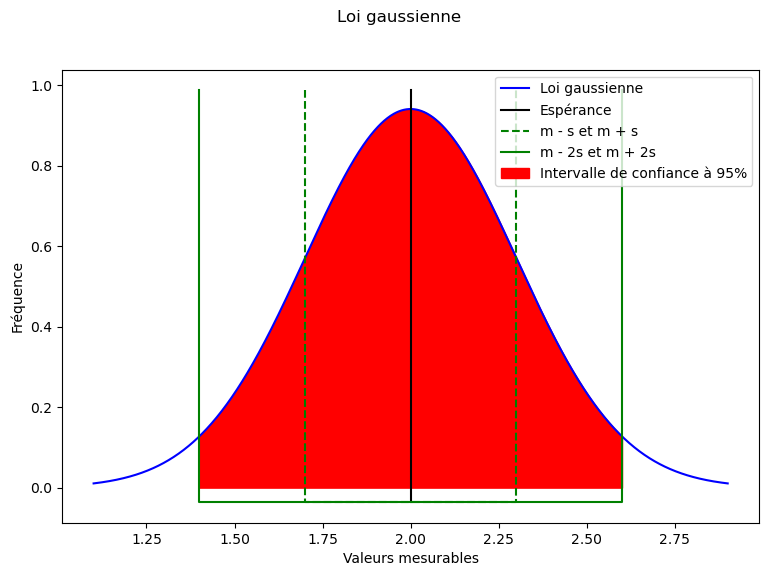

In [2]:
from reponses.reponses import gaussienne
m = 2  # Espérance
s = 0.3  # Ecart-type
f = gaussienne(m, s)
plt.show()

### Simulation d'un tirage

Nous aurons régulièrement besoin de simuler des lois statistiques avec Python et notamment la loi normale.
Nous allons voir comment le faire dans la cellule suivante.

Lisez le code et chercher à le comprendre pour pouvoir l'utiliser ensuite.

---------------
Estimation
Moyenne =  0.3014371254434051
Ecart-type =  2.0104811901308106
---------------
Valeur théorique d'une distribution uniforme
Moyenne :  0.3
Ecart-type :  2
---------------


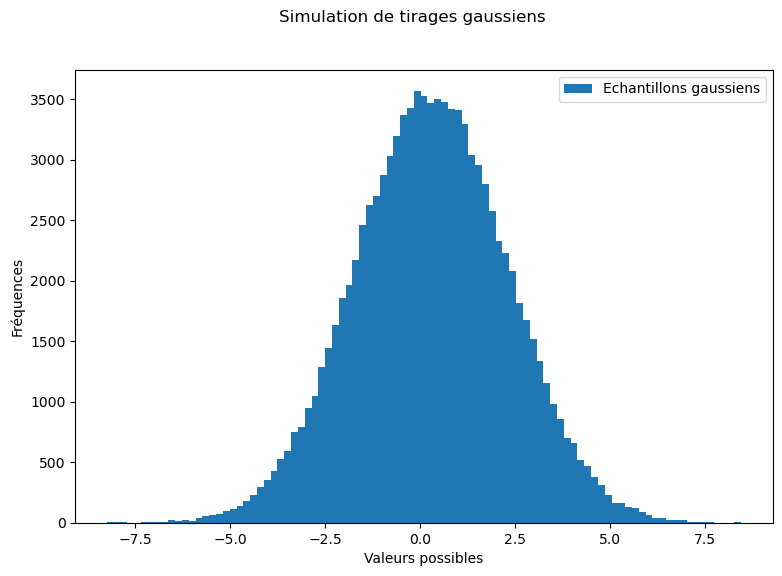

In [3]:
# La simulation nécessite la bibliothèque numpy.random qui a déjà été importée.

"""
La fonction normal(m, s, N) (bibliothèque numpy.random) va créer un vecteur
de taille N simulant N tirages aléatoires suivant une distribution
normale d'espérance m et d'écart-type s.
"""
N = 100000
s = 2  # Espérance
m = 0.3  # Ecart-type
datsim = rd.normal(m, s, N)

"""
Pour vérifier qu'on retombe bien sur les grandeurs, on va estimer
la moyenne et l'écart-type de l'échantillon créé précédemment.
Retenez ces fonctions qui sont très utiles. Elles appartiennent à
la bibliothèque numpy
"""
mech = np.mean(datsim)
sech = np.std(datsim, ddof=1)  # L'option ddof permet de diviser par N-1 et non par N

print("---------------")
print("Estimation")
print("Moyenne = ", mech)
print("Ecart-type = ", sech)
print("---------------")
print("Valeur théorique d'une distribution uniforme")
print("Moyenne : ", m)
print("Ecart-type : ", s)
print("---------------")


"""
On va maintenant tracer l'histogramme de l'échantillons
La fonction subplots créer une fenêtre graphique f avec des axes ax (ici un seul). Les options figsize et dpi ne sont pas à connaître.
Elles servent juste à avoir une figure plus grande.
"""
f, ax = plt.subplots(1, 1, figsize=(9, 6), dpi=100)
f.suptitle("Simulation de tirages gaussiens")  # Titre du graphique
ax.set_xlabel("Valeurs possibles")
ax.set_ylabel("Fréquences")

# On utilise hist(valeurs, bins) (bibliothèque matplotlib.pyplot)
# pour tracer l'histogramme.
ax.hist(datsim, bins='rice', label="Echantillons gaussiens")
ax.legend()  # On ajoute la légende (le label)

plt.show()

### Intérêt de la distribution gaussienne
La distribution gaussienne possède deux intérêts :
* L'étude des fluctuations statistique des grandeur tend à montrer qu'une grandeur flucture généralement de
manière gaussienne autour desa valeur à l'équilibre
* La distribution statistique d'un mesurande direct est souvent la combinaison de plusieurs sources
d'incertitude possédant chacun une distribution statistique propre.
En général, lorsqu'on combine plusieurs distributions (sous certaines conditions non précisées ici)
on tend vers une distribution gaussienne de sorte qu'en général, l'hypothèse d'une telle distribution
pour le mesurande direct est assez acceptable. _Il s'agit d'une application du théorème central limite._